# Assignment 2 - Unsupervised Learning

#### Task 1 (3 points):

1. Data normalization
    - Look at features of Linnerud dataset, tell what is the problem with them
          from sklearn.datasets import load_linnerud
    - Normalize these features using a correct method. Plot original vs normalized probability density.

In [1]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.max_rows = 3000
pd.set_option('display.width', 1200)
%matplotlib inline 

In [2]:
from sklearn.datasets import load_linnerud

data = load_linnerud(as_frame=True)
data.data.head()

,Chins,Situps,Jumps
0,5.0,162.0,60.0
1,2.0,110.0,60.0
2,12.0,101.0,101.0
3,12.0,105.0,37.0
4,13.0,155.0,58.0


In [3]:
data.target.head()

,Weight,Waist,Pulse
0,191.0,36.0,50.0
1,189.0,37.0,52.0
2,193.0,38.0,58.0
3,162.0,35.0,62.0
4,189.0,35.0,46.0


In [4]:
data.data.corr()

,Chins,Situps,Jumps
Chins,1.000000,0.695727,0.495760
Situps,0.695727,1.000000,0.669206
Jumps,0.495760,0.669206,1.000000


In [5]:
data.data.shape

(20, 3)

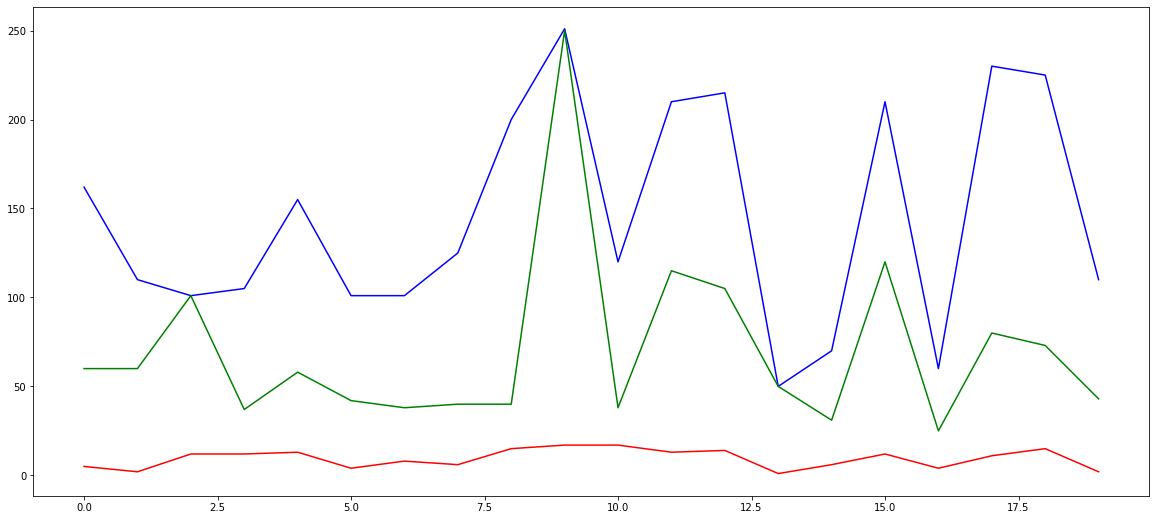

In [6]:
plt.figure(figsize=(20,9))
plt.plot(data.data.Chins, color='red')
plt.plot(data.data.Situps, color='blue')
plt.plot(data.data.Jumps, color='green')

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standard_data = scaler.fit_transform(data.data)
standard_data

array([[-0.86367072,  0.26975016, -0.20608616],
       [-1.44592064, -0.58295552, -0.20608616],
       [ 0.49491243, -0.7305392 ,  0.61425681],
       [ 0.49491243, -0.66494645, -0.66627856],
       [ 0.68899574,  0.15496286, -0.24610289],
       [-1.05775403, -0.7305392 , -0.56623674],
       [-0.2814208 , -0.7305392 , -0.6462702 ],
       [-0.66958741, -0.33698273, -0.60625347],
       [ 1.07716236,  0.89288124, -0.60625347],
       [ 1.46532897,  1.72918874,  3.59550323],
       [ 1.46532897, -0.41897366, -0.6462702 ],
       [ 0.68899574,  1.0568631 ,  0.89437393],
       [ 0.88307905,  1.13885404,  0.69429027],
       [-1.64000395, -1.5668467 , -0.40616981],
       [-0.66958741, -1.23888297, -0.78632875],
       [ 0.49491243,  1.0568631 ,  0.99441575],
       [-1.05775403, -1.40286484, -0.90637895],
       [ 0.30082913,  1.38482683,  0.19408114],
       [ 1.07716236,  1.3028359 ,  0.05402259],
       [-1.44592064, -0.58295552, -0.54622837]])

<AxesSubplot:xlabel='Chins', ylabel='Density'>

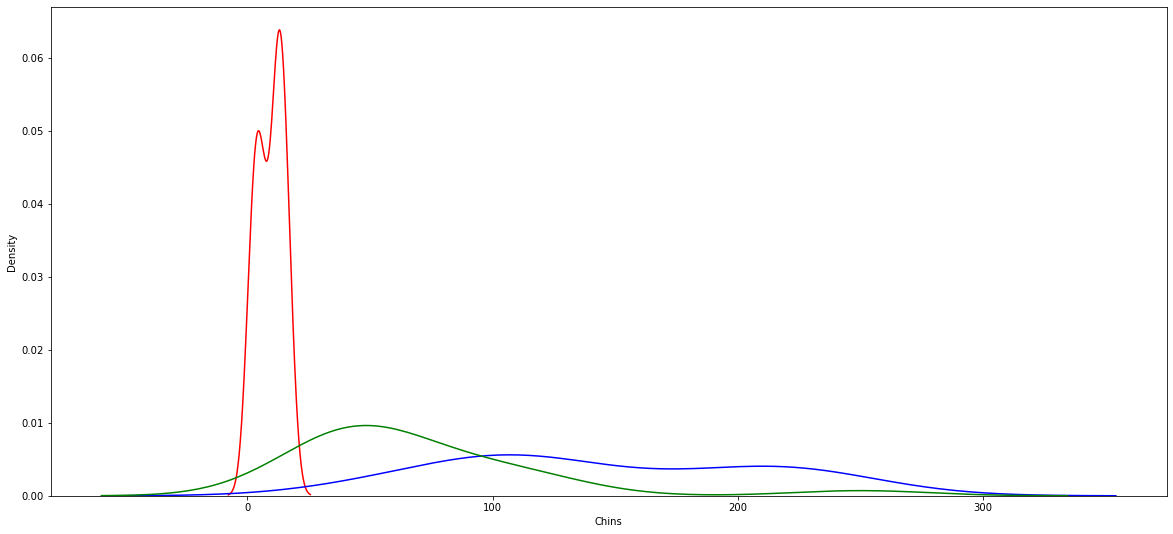

In [8]:
import seaborn as sns

plt.figure(figsize=(20,9))
sns.kdeplot(data.data.Chins, color='red')
sns.kdeplot(data.data.Situps, color='blue')
sns.kdeplot(data.data.Jumps, color='green')

<AxesSubplot:xlabel='Jumps', ylabel='Density'>

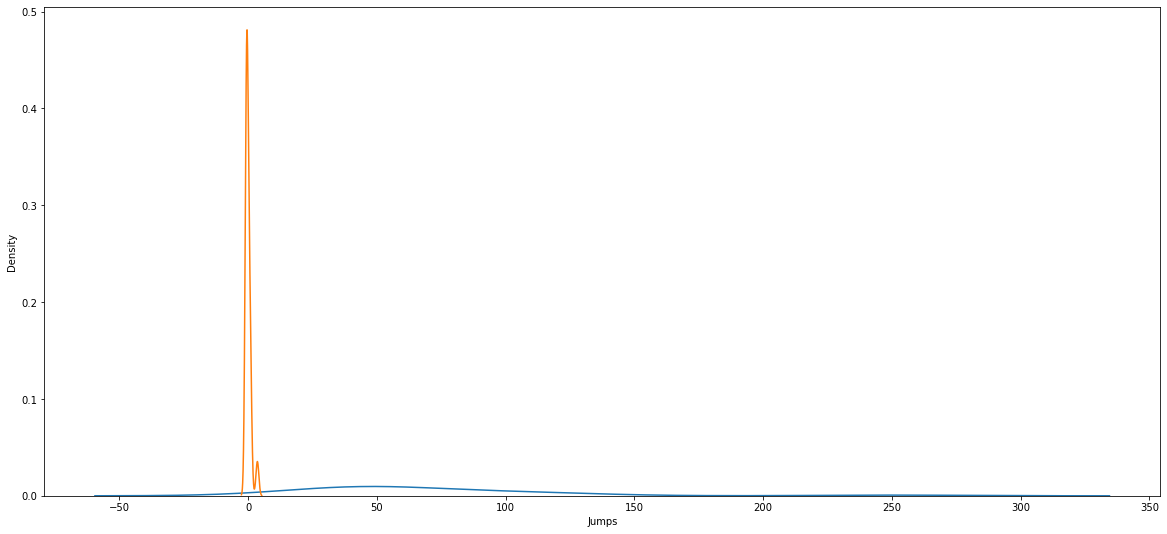

In [9]:
plt.figure(figsize=(20,9))
sns.kdeplot(data.data.Jumps)
sns.kdeplot(standard_data[:,2])

<AxesSubplot:xlabel='Situps', ylabel='Density'>

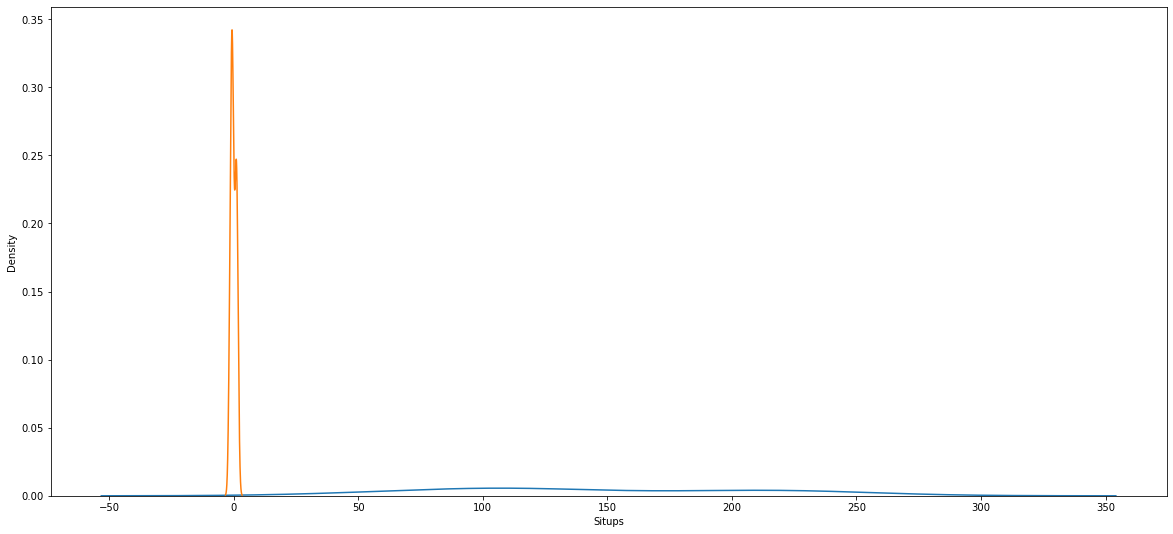

In [10]:
plt.figure(figsize=(20,9))
sns.kdeplot(data.data.Situps)
sns.kdeplot(standard_data[:,1])

#### Task 2 (4 points):  
2. Dimensionality reduction
    - Load 20 News Dataset
          from sklearn.datasets import fetch_20newsgroups_vectorized
          data = fetch_20newsgroups_vectorized(subset='train')
    - Use KernelPCA for dimensionality reduction. Train a classifier at different nr of dimensions, check how model score changes with dimensions
          Remember that you can load training and testing subsets of data!

In [11]:
from sklearn.datasets import fetch_20newsgroups_vectorized
train = fetch_20newsgroups_vectorized(subset='train',as_frame=True, normalize=True)

In [12]:
train.data.head()

,00,000,0000,00000,000000,00000000,0000000004,0000000005,00000000b,00000001,...,çon,ère,ée,égligent,élangea,érale,ête,íålittin,ñaustin,ýé
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
train.target.head()

0    17
1     7
2    10
3    10
4     7
Name: category_class, dtype: int32

In [14]:
train.data.shape

(11314, 130107)

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

test = fetch_20newsgroups_vectorized(subset='test', as_frame=True, normalize=True)

print(classification_report(test.target, RandomForestClassifier().fit(train.data, train.target).predict(test.data)))

              precision    recall  f1-score   support

           0       0.70      0.66      0.68       319
           1       0.53      0.69      0.60       389
           2       0.67      0.76      0.71       394
           3       0.66      0.64      0.65       392
           4       0.75      0.76      0.75       385
           5       0.76      0.71      0.74       395
           6       0.72      0.91      0.80       390
           7       0.80      0.81      0.80       396
           8       0.89      0.89      0.89       398
           9       0.83      0.92      0.87       397
          10       0.90      0.93      0.92       399
          11       0.89      0.91      0.90       396
          12       0.69      0.48      0.57       393
          13       0.84      0.66      0.74       396
          14       0.84      0.88      0.86       394
          15       0.68      0.92      0.79       398
          16       0.65      0.85      0.74       364
          17       0.95    

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
train_pca = pca.fit_transform(train.data.values)

In [17]:
train_pca.shape

(11314, 200)

In [18]:
test_pca = pca.transform(test.data.values)

print(classification_report(test.target, RandomForestClassifier().fit(train_pca, train.target).predict(test_pca)))

              precision    recall  f1-score   support

           0       0.40      0.28      0.33       319
           1       0.33      0.40      0.36       389
           2       0.47      0.52      0.49       394
           3       0.38      0.37      0.38       392
           4       0.41      0.40      0.41       385
           5       0.42      0.42      0.42       395
           6       0.61      0.73      0.67       390
           7       0.47      0.51      0.49       396
           8       0.48      0.59      0.53       398
           9       0.40      0.40      0.40       397
          10       0.57      0.67      0.61       399
          11       0.64      0.57      0.60       396
          12       0.26      0.22      0.24       393
          13       0.33      0.26      0.29       396
          14       0.62      0.59      0.61       394
          15       0.40      0.65      0.50       398
          16       0.47      0.49      0.48       364
          17       0.74    

In [19]:
np.sum(pca.explained_variance_ratio_)

0.4822166100445249

In [20]:
pca = PCA(n_components=300)
train_pca = pca.fit_transform(train.data.values)
test_pca = pca.transform(test.data.values)

print(classification_report(test.target, RandomForestClassifier().fit(train_pca, train.target).predict(test_pca)))
print(np.sum(pca.explained_variance_ratio_))

              precision    recall  f1-score   support

           0       0.36      0.32      0.34       319
           1       0.29      0.38      0.33       389
           2       0.49      0.53      0.51       394
           3       0.38      0.36      0.37       392
           4       0.39      0.39      0.39       385
           5       0.46      0.42      0.44       395
           6       0.54      0.68      0.60       390
           7       0.48      0.48      0.48       396
           8       0.50      0.54      0.52       398
           9       0.44      0.40      0.42       397
          10       0.62      0.70      0.66       399
          11       0.62      0.58      0.60       396
          12       0.23      0.19      0.21       393
          13       0.30      0.26      0.28       396
          14       0.62      0.59      0.61       394
          15       0.38      0.72      0.50       398
          16       0.50      0.49      0.49       364
          17       0.77    

In [29]:
# it is good a idea to use variance ratio instead of n_components
# but it takes too much time of running :(
pca = PCA(0.9)

#### Task 3 (8 points):
Clustering
Cluster 20 News Dataset into 20 clusters. Print true class vs cluster distribution.
Did you manage to recover the original clusters?  (give students an example plot)

In [25]:
train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [26]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=20, init='k-means++', max_iter=400, n_init=1, random_state=41)
km.fit(train.data)

KMeans(max_iter=400, n_clusters=20, n_init=1, random_state=41)

<AxesSubplot:>

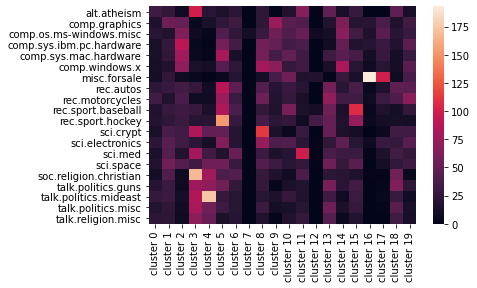

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

cm = confusion_matrix(train.target, km.labels_)
sn.heatmap(cm, yticklabels=train.target_names, 
           xticklabels=["cluster {}".format(i) for i in range(20)])